# Exercise 1: Linear Regression

### This notebook is executed automatically. Failing to meet any of the submission requirements will results in a 25 point fine or your submission not being graded at all. Kindly reminder: the homework assignments grade is 50% of the final grade. 

### Make sure you restart the notebook and check the filename before submission. Appeals based on wrong filenames and errors due to syntax and execution errors will not be accepted.

### Do not start the exercise until you fully understand the submission guidelines.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Preprocess the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Fit a linear regression model using a single feature.
1. Visualize your results using matplotlib.
1. Perform multivariate linear regression.
1. Perform polynomial regression.
1. Experiment with adaptive learning rates.

# I have read and understood the instructions: XXXXXXXXX XXXXXXXXX

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part 1: Data Preprocessing (10 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


In [5]:
# adding df.info() for organized listing of feature names & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  yr_built       5000 non-null   int64  
 14  yr_renovated   5000 non-null   int64  
 15  zipcode        5000 non-null   int64  
 16  lat            5000 non-null   float64
 17  long           5000 non-null   float64
 18  sqft_liv

We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [6]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

Implement the cost function `preprocess`.

In [7]:
def mean_normalize(data):
    """
    Perform mean normalization on the features and true labels.

    Note: Orig used mean normalization standardization (std_dev in denominator) as taught in class
    ...then switched to mean normalization method with (x_max - x_min) in denominator per Ben on piazza
    """
    return (data - data.mean(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [10]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns two values:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    ###########################################################################
    # TODO: Implement the normalization function.                             #
    ###########################################################################
    
    X, y = mean_normalize(X), mean_normalize(y)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y

In [11]:
X, y = preprocess(X, y)
X, y

(array([-0.09120464,  0.0526877 , -0.1336477 , ..., -0.04979677,
        -0.08602865,  0.01438542]),
 array([-0.04546455, -0.00021043, -0.05146311, ..., -0.04380384,
        -0.01996705,  0.00107805]))

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [12]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

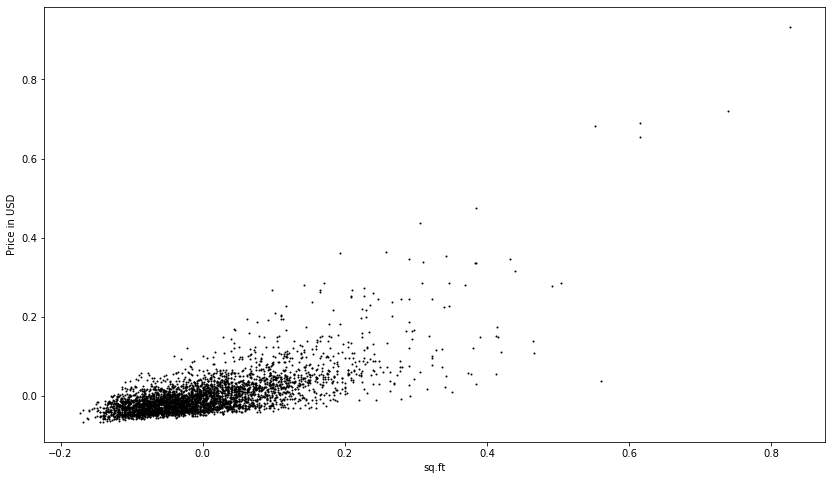

In [13]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show();

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predictions of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zero$^{th}$ column of the features (do this for both the training and validation sets).

In [14]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

def bias_trick(X):
    """
    Input:
    - X: inputs  (n features over m instances).
    
    Output:
    - stacks 2 1D arrays (X and np.ones of =size) into 2D column array
    - Returns X with a column of ones as the zeroth column, ie the bias 𝜃_0 
     
    Example:
    Input = [0, 10]
    Output = [1, 0]
             [1, 10]
    """

    return np.column_stack((np.ones(X.shape[0]), X))

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

In [15]:
X_train, X_val = bias_trick(X_train), bias_trick(X_val)
print(X_train.shape, "\n", X_train) # check that bias_trick worked

(4000, 2) 
 [[ 1.         -0.07464149]
 [ 1.         -0.02081126]
 [ 1.          0.15931296]
 ...
 [ 1.         -0.08188787]
 [ 1.         -0.03116323]
 [ 1.         -0.02598725]]


## Part 2: Single Variable Linear Regression (40 Points)
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Implement the cost function `compute_cost`. (10 points)

In [16]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
   
    # using np.mean to avoid extra step of defining m instances
    J = np.mean((X @ theta - y) ** 2) / 2 
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [17]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)
print (f'𝐽(𝜃) = {J:.3f}')

𝐽(𝜃) = 0.511


Implement the gradient descent function `gradient_descent`. (10 points)

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    
    m = X.shape[0] # number of instances or samples (4k for X_train)

    for gd in range(num_iters): 
        J_history.append(compute_cost(X, y, theta)) 
        theta -= (alpha / m) * X.T @ (X @ theta - y) # update theta after J calc

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [19]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
print (f'Univariate Regression Thetas: {theta} \n', "="*40)
J_val = compute_cost(X_val, y_val, theta)
print(f'MSE on univariate training set, 𝐽(𝜃)_min: {J_history[-1]:.5f}\n')
print(f'MSE on validation/testing set: {J_val:.5f}')

Univariate Regression Thetas: [1.94301549e-04 4.08751964e-01] 
MSE on univariate training set, 𝐽(𝜃)_min: 0.00080

MSE on validation/testing set: 0.00071


You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

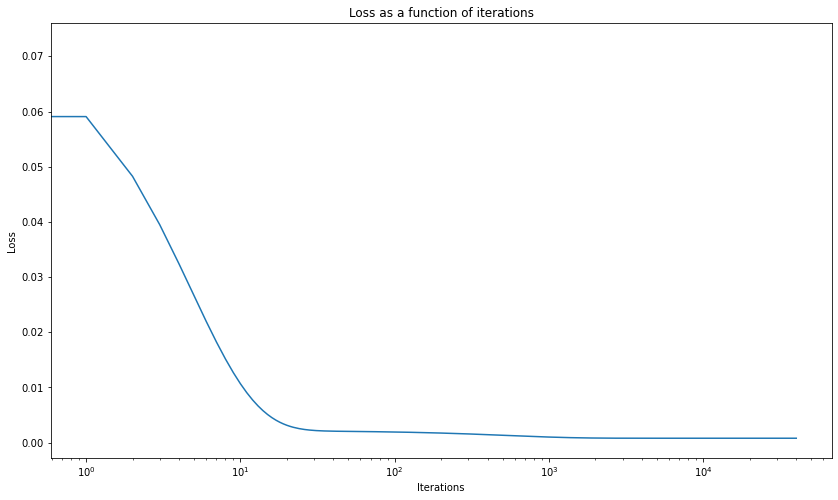

In [20]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show();

Implement the pseudo-inverse function `pinv`. **Do not use `np.linalg.pinv`**, instead use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`). (10 points)

from https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71


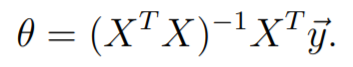

In [21]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################
    
    pinv_theta = np.linalg.inv(X.T @ X) @ X.T @ y # from Normal Equation above (credit: Andrew Ng)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [22]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)
print(f'Pseudo-Inverse Theta: {theta_pinv}, \n 𝐽(𝜃_pinv): {J_pinv:.4f}')

Pseudo-Inverse Theta: [1.94301549e-04 4.08751964e-01], 
 𝐽(𝜃_pinv): 0.0008


We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

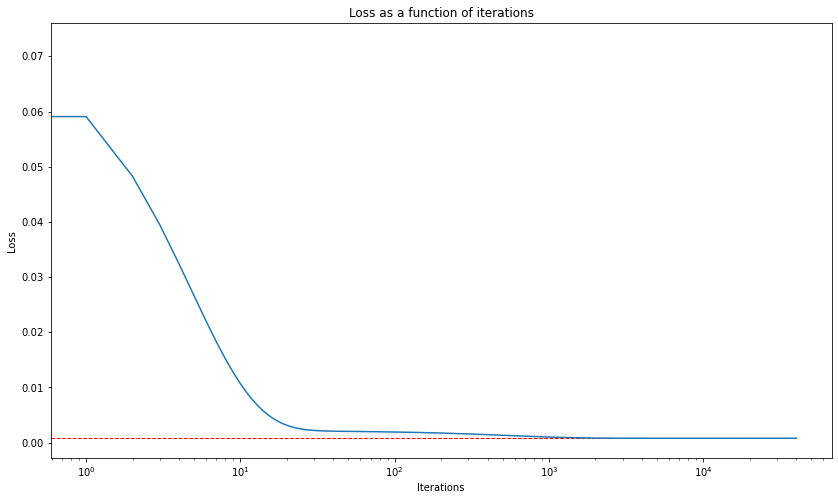

In [23]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show();

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. Implement the function `efficient_gradient_descent`. (5 points)

In [24]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.
    **{should be - threshold: loss improvement stop condition}

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    **- iters: output num of iters until stopping condition reached** {added}
    """
    # last input should really be threshold (1e-8) instead of num_iters, no? 
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    
    m = X.shape[0] # m instances - needed for GD formula (unless use .mean)
    threshold = 1e-8
    loss_chg = 1
    iters = 1
    
    while loss_chg >= threshold:
        J_history.append(compute_cost(X, y, theta))    
        theta -= (alpha / m) * X.T @ (X @ theta - y)
        
        if iters > 1: 
            loss_chg = abs(J_history[iters - 1] - J_history[iters - 2]) # account for diff indexes
        iters += 1 

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history, iters

### Adding output for efficient gradient descent:

In [25]:
np.random.seed(42)
theta = np.random.random(size = 2)
iterations = 40000
alpha = 0.1
theta, J_history, iters = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations)
print (f'The resulting # of iterations until 1e-8 loss improvement threshold was met was: {iters:.0f} \n')
print (f'Univariate Regression Thetas using Efficient GD: {theta} \n \n', "="*40, '\n')
J_val = compute_cost(X_val, y_val, theta)
print(f'MSE on univariate training set w Effic GD, 𝐽(𝜃)_min: {J_history[-1]:.5f}\n')
print (f'MSE on validation/testing set: {J_val:.5f}')

The resulting # of iterations until 1e-8 loss improvement threshold was met was: 2986 

Univariate Regression Thetas using Efficient GD: [1.57852216e-04 4.42833488e-01] 
 

MSE on univariate training set w Effic GD, 𝐽(𝜃)_min: 0.00081

MSE on validation/testing set: 0.00072


The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [26]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    for key in alphas:
        print(f'Loss for alpha = {key} is com-pu-tiiiing...please hold') # status updates
        np.random.seed(42)
        theta = np.random.random(X_train.shape[1]) # corresponding n random thetas to start

        theta, J_hist = gradient_descent(X_train, y_train, theta, key, iterations)

        alpha_dict[key] = compute_cost(X_val, y_val, theta) # training thetas compute cost in validation data


    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [29]:
import warnings 
warnings.filterwarnings('ignore') # only added to suppress ugly output for alpha = 3

alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)
print("="*20, f"\n Alpha Dictionary: {alpha_dict}")

Loss for alpha = 1e-05 is com-pu-tiiiing...please hold
Loss for alpha = 3e-05 is com-pu-tiiiing...please hold
Loss for alpha = 0.0001 is com-pu-tiiiing...please hold
Loss for alpha = 0.0003 is com-pu-tiiiing...please hold
Loss for alpha = 0.001 is com-pu-tiiiing...please hold
Loss for alpha = 0.003 is com-pu-tiiiing...please hold
Loss for alpha = 0.01 is com-pu-tiiiing...please hold
Loss for alpha = 0.03 is com-pu-tiiiing...please hold
Loss for alpha = 0.1 is com-pu-tiiiing...please hold
Loss for alpha = 0.3 is com-pu-tiiiing...please hold
Loss for alpha = 1 is com-pu-tiiiing...please hold
Loss for alpha = 2 is com-pu-tiiiing...please hold
Loss for alpha = 3 is com-pu-tiiiing...please hold
 Alpha Dictionary: {1e-05: 0.03315313543381558, 3e-05: 0.008192951588224312, 0.0001: 0.0019743816823580705, 0.0003: 0.0017952179251561678, 0.001: 0.0013675183294403243, 0.003: 0.0008713832962435313, 0.01: 0.0007110832423673495, 0.03: 0.0007084293856373828, 0.1: 0.0007084282449873675, 0.3: 0.000708428

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [28]:
best_alpha = None
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

best_alpha = sorted(alpha_dict, key=alpha_dict.get)[:1][0]

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

print(f'Best learning rate (𝛼) = {best_alpha}')

Best learning rate (𝛼) = 1


Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations (Use 10,000 iterations). Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

In [30]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

best_three_alphas = sorted(alpha_dict, key=alpha_dict.get)[0:3]
print(f'Top 3 alphas / learning rates = {best_three_alphas}')

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Top 3 alphas / learning rates = [1, 0.3, 0.1]


### Best 3 Alphas - Visualization:

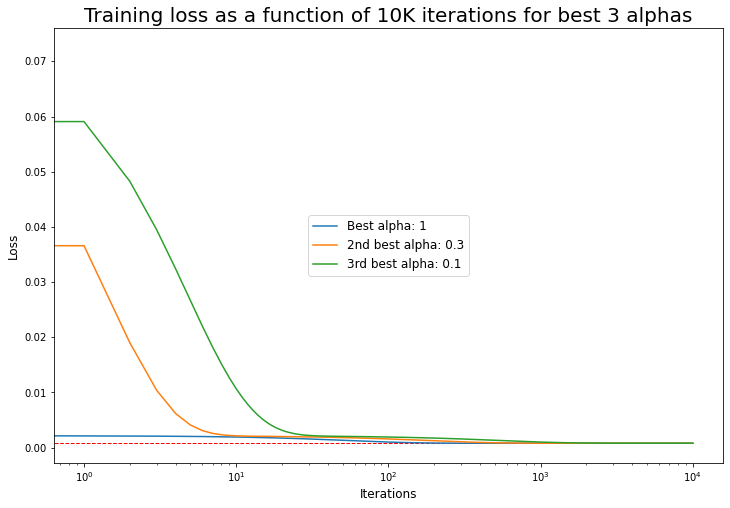

In [31]:
plt.figure(figsize = (12,8))
iterations = 10000
for key in best_three_alphas:
    np.random.seed(42)
    theta = np.random.random(size=2)
    theta, J_history = gradient_descent(X_train, y_train, theta, key, iterations)
    plt.plot(np.arange(iterations), J_history, label=key)

# use same scales & labels as previous loss function graphs for apples-to-apples comp
plt.xscale('log')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training loss as a function of 10K iterations for best 3 alphas', fontsize=20)
plt.legend([f'Best alpha: {best_alpha}', f'2nd best alpha: {best_three_alphas[1]}', 
            f'3rd best alpha: {best_three_alphas[2]}'], loc='center', fontsize=12)
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show();

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

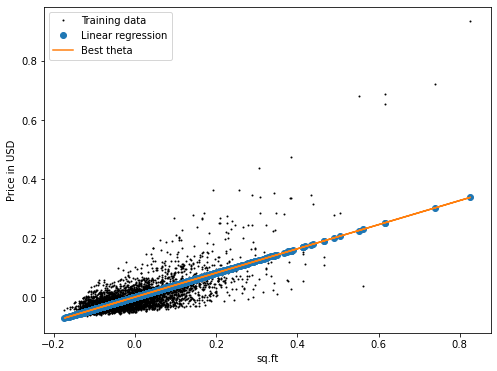

In [32]:

theta = np.random.random(size = X_train.shape[1])
theta, J_hist = gradient_descent(X_train, y_train, theta, best_alpha, 40000)

plt.figure(figsize = (8, 6));
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k');
plt.ylabel('Price in USD');
plt.xlabel('sq.ft'); 
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o'); 
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-');

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression (30 points)

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [33]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.shape

(5000, 20)

## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [35]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [36]:
# preprocessing
X, y = preprocess(X, y)

In [37]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [38]:
X_train.shape

(4000, 17)

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

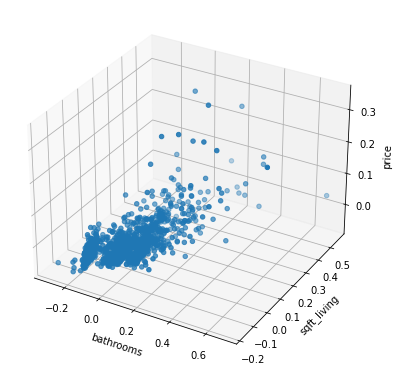

In [39]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [40]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

X_train, X_val = bias_trick(X_train), bias_trick(X_val)
X_train.shape # check to make sure bias_trick worked for n-dim X input matrix (4000,18)

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

(4000, 18)

Make sure the functions `compute_cost` (10 points), `gradient_descent` (15 points), and `pinv` (5 points) work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [41]:
theta = np.ones(X_train.shape[1])
J = compute_cost(X_train, y_train, theta)
print (f'Multivariate regression MSE 𝐽(𝜃) w/random thetas: {J:.5f}')

Multivariate regression MSE 𝐽(𝜃) w/random thetas: 0.94691


In [42]:
np.random.seed(42)
theta = np.random.random(X_train.shape[1])
iterations = 40000
theta, J_history = gradient_descent(X_train, y_train, theta, best_alpha, iterations)

print (f'Thetas for multivariate regression: {theta} \n \n', "="*40, '\n')
J_val = compute_cost(X_val, y_val, theta)
print(f'MSE on multivariate training set, 𝐽(𝜃)_min: {J_history[-1]:.5f}\n')
print(f'MSE on validation/testing set: {J_val:.5f}')

Thetas for multivariate regression: [ 2.13594754e-04 -5.81882342e-02  2.25011708e-02  2.43443642e-01
  1.45099553e-03  3.28001377e-04  1.14192068e-01  2.75149885e-02
  1.16945498e-02  1.30819392e-01  3.19911338e-02 -4.77569048e-02
  4.38559155e-03 -1.68765887e-02  5.11881918e-02 -3.06079420e-02
  2.50028220e-02 -2.71593683e-02] 
 

MSE on multivariate training set, 𝐽(𝜃)_min: 0.00047

MSE on validation/testing set: 0.00042


In [43]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)
print(f'Pseudo-Inverse X-Var Theta: {theta_pinv}, \n', '='*40, f'\n 𝐽(𝜃_pinv)_min: {J_pinv:.4f}')

Pseudo-Inverse X-Var Theta: [ 2.13594754e-04 -5.81882342e-02  2.25011708e-02  2.43443642e-01
  1.45098776e-03  3.28001330e-04  1.14192068e-01  2.75149885e-02
  1.16945498e-02  1.30819392e-01  3.19911340e-02 -4.77569048e-02
  4.38559153e-03 -1.68765887e-02  5.11881918e-02 -3.06079419e-02
  2.50028219e-02 -2.71593661e-02], 
 𝐽(𝜃_pinv)_min: 0.0005


We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

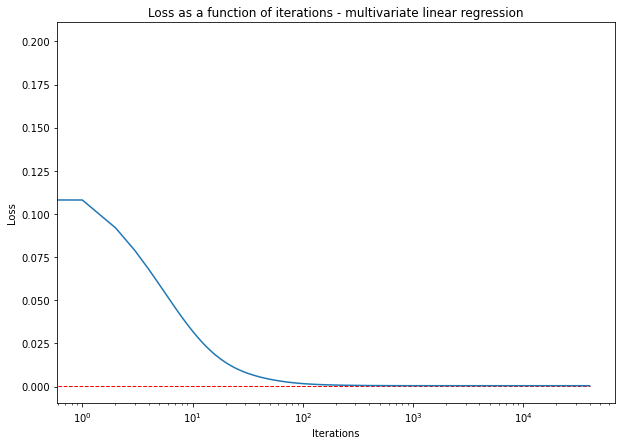

In [44]:
plt.figure(figsize = (10,7))
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Polynomial Regression (10 points)

Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

As required. 

For this exercise, use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

and evaluate the MSE cost on the training and testing datasets.

In [45]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
### Your code here ###

def quadratic_combinations(df):
    rng = range(len(df.columns))
    return pd.concat([df.iloc[:, i:].mul(df.iloc[:, i], axis=0) for i in rng],
                     axis=1, keys=df.columns)

df_quadratic = pd.concat([all_features, quadratic_combinations(all_features)], axis=1)

print(f'Resulting quadratic feature combo dataset has {df_quadratic.shape[1]} features, pre-bias')
df_quadratic.head()

Resulting quadratic feature combo dataset has 170 features, pre-bias


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,"(lat, lat)","(lat, long)","(lat, sqft_living15)","(lat, sqft_lot15)","(long, long)","(long, sqft_living15)","(long, sqft_lot15)","(sqft_living15, sqft_living15)","(sqft_living15, sqft_lot15)","(sqft_lot15, sqft_lot15)"
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,2257.314125,-5808.576778,63665.008,268438.2800,14946.774049,-163824.38,-690752.050,1795600,7571000,31922500
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,2277.293841,-5837.184999,80648.490,364540.7190,14961.937761,-206719.11,-934394.841,2856100,12909910,58354321
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,2278.907096,-5835.146731,129847.088,384862.9498,14940.906289,-332473.76,-985442.446,7398400,21928640,64995844
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,2258.226433,-5816.213274,64628.288,237604.0000,14980.046449,-166454.48,-611965.000,1849600,6800000,25000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,2267.359642,-5811.392356,85710.240,357268.8504,14894.982025,-219681.00,-915703.635,3240000,13505400,56295009


In [47]:
df_quadratic.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,"(lat, lat)","(lat, long)","(lat, sqft_living15)","(lat, sqft_lot15)","(long, long)","(long, sqft_living15)","(long, sqft_lot15)","(sqft_living15, sqft_living15)","(sqft_living15, sqft_lot15)","(sqft_lot15, sqft_lot15)"
count,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,...,2261.907601,-5812.504998,94024.314354,6.394521e+05,14936.737518,-241572.745948,-1.642866e+06,4.363095e+06,3.043571e+07,8.838251e+08
std,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,...,13.261841,19.146642,32122.188990,1.259665e+06,34.642851,82350.372694,3.235174e+06,3.245702e+06,6.998693e+07,6.413257e+09
min,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,...,2223.678905,-5847.213798,29467.732000,3.150464e+04,14717.329225,-707138.490000,-5.300378e+07,3.844000e+05,8.052000e+05,4.356000e+05
25%,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,...,2252.800445,-5829.657941,70637.167250,2.564985e+05,14915.492641,-286084.890000,-1.278168e+06,2.220100e+06,8.956315e+06,2.906827e+07
50%,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,...,2263.176057,-5814.647213,86700.395500,3.707634e+05,14941.395225,-222748.890000,-9.540648e+05,3.312400e+06,1.401188e+07,6.084000e+07
75%,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,...,2273.306113,-5798.739070,111361.788750,4.979418e+05,14964.384241,-181688.365000,-6.593326e+05,5.475600e+06,2.328856e+07,1.096052e+08
max,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,...,2282.699062,-5736.326611,275201.595000,2.076787e+07,15009.680196,-75873.120000,-8.074902e+04,3.352410e+07,1.106480e+09,1.889884e+11


In [48]:
X = df_quadratic.values
y = df['price'].values
X, y = preprocess(X, y)

In [49]:
# training and validation split for quadratic (polynomial) regression
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

# add bias 
X_train, X_val = bias_trick(X_train), bias_trick(X_val)
print(X_train.shape) # check that bias_trick worked (should be (4000,171))

(4000, 171)


In [50]:
np.random.seed(42)
iterations = 40000
theta = np.random.random(X_train.shape[1])
theta, J_history = gradient_descent(X_train, y_train, theta, best_alpha, iterations)

print (f'Polynomial Regression Thetas: \n {theta[:5]} (first 5) \n {theta[166:]} (last 5) \n', '='*40, '\n')
J_val = compute_cost(X_val, y_val, theta)
print(f'MSE on quadratic training set, 𝐽(𝜃_poly)_min: {J_history[-1]:.5f}\n')
print(f'MSE on validation/testing set: {J_val:.5f}')

Polynomial Regression Thetas: 
 [ 2.97528315e-04  5.05546964e-01  5.18099246e-01  2.74834896e-01
 -2.53119108e-01] (first 5) 
 [0.56134691 0.41811721 0.15352102 0.10042883 0.11703341] (last 5) 

MSE on quadratic training set, 𝐽(𝜃_poly)_min: 0.00029

MSE on validation/testing set: 0.00041


### Commentary on Quadratic Dataset and theta_pinv:
Note we could not calculate a theta_pinv with the expanded 171-feature quadratic dataset, so we wanted to comment briefly on why that could be. Note there are 5 features in the data that are either Booleans masked as floats (eg waterfront) and/or have minimum values in the data that are 0. If the original data contain either a 0 or 1 (in either of the instances of the product), then the resulting product of those two features will be:

- the same as one or both features if the data of one or both features = 1, rendering the new $x_{i}\cdot x_{j}$ column (or those cells / instances) redundant, useless, and potentially even harmful to the accuracy and efficiency of the model. And if one or both of $x_{i}$ or $x_{j} = 0$ then the resulting product will also =0, and just duplicate the feature with value 0. 


This was the case for the **following 5 features**: 
1) Waterfront (really a 1 or 0 Boolean disguised as a float)

2) View (had 0's)

3) Bedrooms (had 0's)

4) Bathrooms (had 0's) 

5) Year Renovated (which had a 0 unless there was a specific renovation date, as most places aren't renovated)

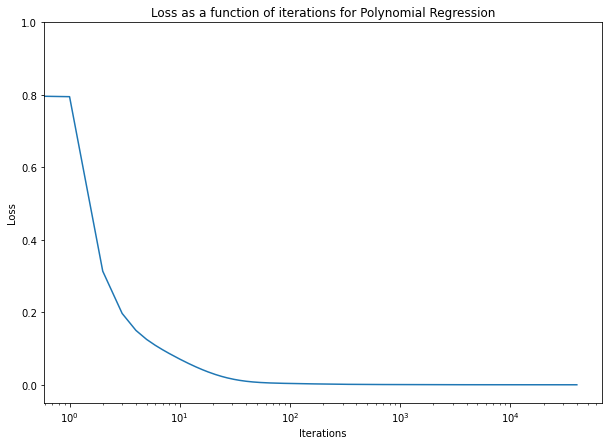

In [55]:
# plot resulting loss function from polynomial regression 
plt.figure(figsize = (10,7))
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.ylim(-0.05,1) # adding this for better viz, but it's specific to output 😬 
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations for Polynomial Regression')
plt.show();

Give an explanations to the results and compare them to regular linear regression. Do they make sense?

### Use this Markdown cell for your answer

#### The MSE's for the training & validation sets, comparing the two mean-normalization methods we tried, were: 

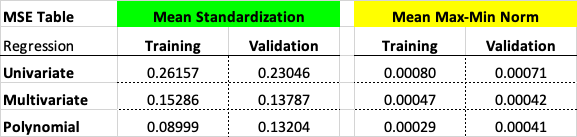


#### The takeaways / conclusions from the above are as follows: 
- As we learned in class, as a function of $\Delta$, or degrees of polynomial, we will always continue to get lower and lower MSE's in the training data as we increase $\Delta$, as by definition we're fitting our best-fit model ($\hat{h}$) to conform to more & more of the data, and since all polynomials of lower degrees are subsets of polynomials with higher degrees (with coefficients of 0). 


- On the other hand, this is not the case for our validation or test data, as there exists a threshold or turning point where the validation loss or MSE actually starts to reverse, and increasing $\Delta$ begins to have the reverse effect, so the graph is more like a wide U-shape or smiley face. In our two normalization methods we see this trend also, as the improvement in MSE completely flattened going from multivariate (17 features) to quadratic (170 features), and had we added more degrees or increased $\Delta$, the validation MSE would've started to increase. 


- One last comment is that the mean normalization method with $X_{max} - X_{min}$ in the denominator, compared to mean normalization/standardization with $X_{std}$ in the denominator (both methods use $X - X_{mean}$ in the numerator) performed significantly better in this exercise across the board, with much lower MSE's and also materially better run-time and efficiency. And interesting topic to debate offline...

## Part 4: Adaptive Learning Rate (10 points)

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Implement the adaptive learning rate method based on the gradient descent algorithm above. 

**Your task is to find proper hyper-parameter values for the adaptive technique and compare this technique to the constant learning rate. Use clear visualizations of the validation loss and the learning rate as a function of the iteration**. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

In [57]:
### Your code here ###

def adaptive_alpha(X, y, theta, alpha_zero, decay, iterations):
    J_history = []
    theta = theta.copy()
    m = X.shape[0] # m instances
    alpha = alpha_zero # starting alpha 
    
    for iters in range (iterations):
        # use alpha_zero for 1st iter, then update
        (alpha := alpha_zero) if (iters == 0) else (alpha := alpha / (1 + decay * iters))
        
        J_history.append(compute_cost(X, y, theta))
        theta -= (alpha / m) * X.T @ (X @ theta - y)
    
    return theta, J_history

## Dataset Comments:
**NOTE:** using original univariate dataset as per Piazza comment from Yarden R on 13-Mar, below:
- "Use the same one you used to find the best alpha in the constant learning rate method."

**NOTE:** this requires re-defining X_train, X_val etc to the original univariate data
- We provide a condensed duplication below to quickly re-define datasets, so don't have to go back to top

## Re-define data to univariate version used to find best_alpha:

In [59]:
df = pd.read_csv('data.csv')
X = df['sqft_living'].values
y = df['price'].values
X, y = preprocess(X, y)
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]
X_train, X_val = bias_trick(X_train), bias_trick(X_val) # add bias

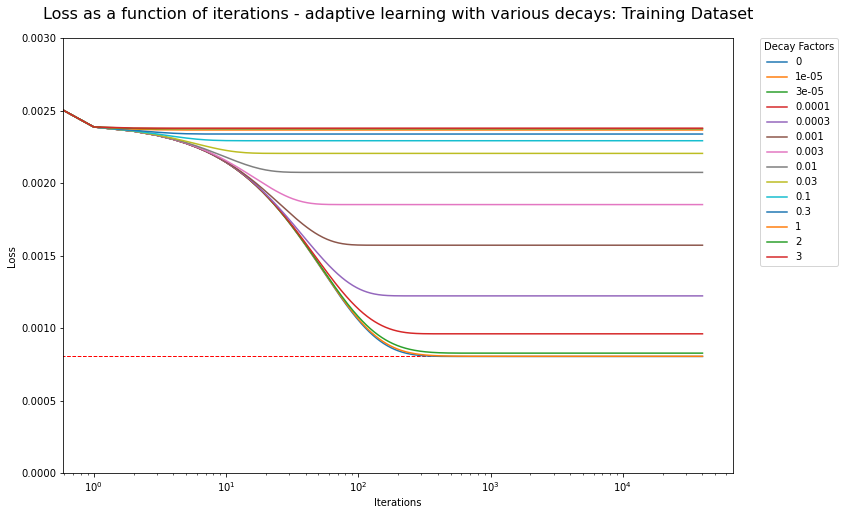

In [64]:
plt.figure(figsize = (12,8))
iterations = 40000
decay_dict = {} # create dict for evaluating MSE on validation data for each decay factor

for decay in [0, 0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]:
    np.random.seed(42)
    theta = np.ones(X_train.shape[1])
    theta, J_history = adaptive_alpha (X_train, y_train, theta, best_alpha, decay, iterations)
    decay_dict[decay] = compute_cost(X_val, y_val, theta)
    plt.plot(np.arange(iterations), J_history, label = decay)

theta_pinv = pinv(X_train, y_train)    
J_pinv_adapt = compute_cost(X_train, y_train, theta_pinv)
    
plt.xscale('log')
plt.ylim(0,0.003) # for enhanced visualization/magnification, at risk of being output-specifc
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - adaptive learning with various decays: Training Dataset', 
             fontsize=16, y=1.03)
plt.hlines(y = J_pinv_adapt, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.legend(title = "Decay Factors", bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show();

In [62]:
print(f'Decay Dictionary: {decay_dict}')

Decay Dictionary: {0: 0.0007084282449873637, 1e-05: 0.0007114715973533488, 3e-05: 0.0007397165816081741, 0.0001: 0.0008805686716559811, 0.0003: 0.001142081171416907, 0.001: 0.0014845926680638337, 0.003: 0.0017566555090923574, 0.01: 0.001971351446440168, 0.03: 0.002097861595438005, 0.1: 0.002182051221721328, 0.3: 0.0022265322895093412, 1: 0.002253383562942629, 2: 0.0022619976602874996, 3: 0.0022654009506461793}


## Visualization for Validation Dataset:

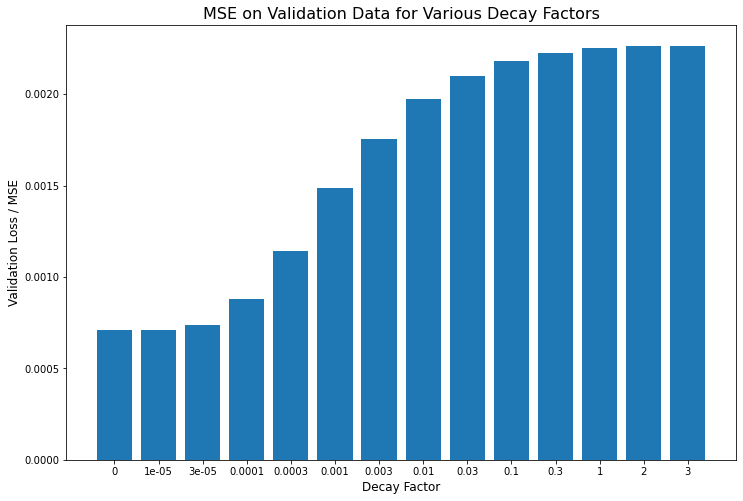

In [65]:
plt.figure(figsize = (12,8))
plt.bar(range(len(decay_dict)), list(decay_dict.values()), align='center')
plt.title("MSE on Validation Data for Various Decay Factors", fontsize=16)
plt.xticks(range(len(decay_dict)), list(decay_dict.keys()))
plt.ylabel("Validation Loss / MSE", fontsize=12)
plt.xlabel("Decay Factor", fontsize=12)
plt.show();

## (Not So) Brief Commentary: 
1) Large decay values 'shrink' our learning rate too quickly and never converge toward the pseudo-inverse value (the horizontal dashed red line), at least not inside our scope of # of iterations. The loss reduction really flattens the larger the decay factor becomes. 

2) The smaller the decay factor gets, the faster the model 'learns' and converges towards the pseudo-inverse loss value. Can illustrate this in the extreme with a decay factor of 0, which means the alpha / learning rate doesn't decay at all and converges to the pseudo-inverse value, as it did earlier in the exercise. Can also clearly see that each progressively lower decay value from 3 down to 0.0001 gets "better", flattening at a lower loss minimum, though none of these decay factors converge all the way to our theoretical $J_{pinv}$. 

3) This relationship can also be observed in our second plot, which looks at the MSE on the validation dataset for each decay factor, and it can be clearly seen that it gets progressively higher as we move to the right and increase the value of the decay factor. Note we **added this decay_dict** in the code above as we need to **evaluate the validation data using the thetas we generated from our training dataset model, or $\hat{h}$**, in a fashion similar to what we did for finding best_alpha above. 